# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score , accuracy_score , recall_score
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df.shape

(614, 13)

In [10]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

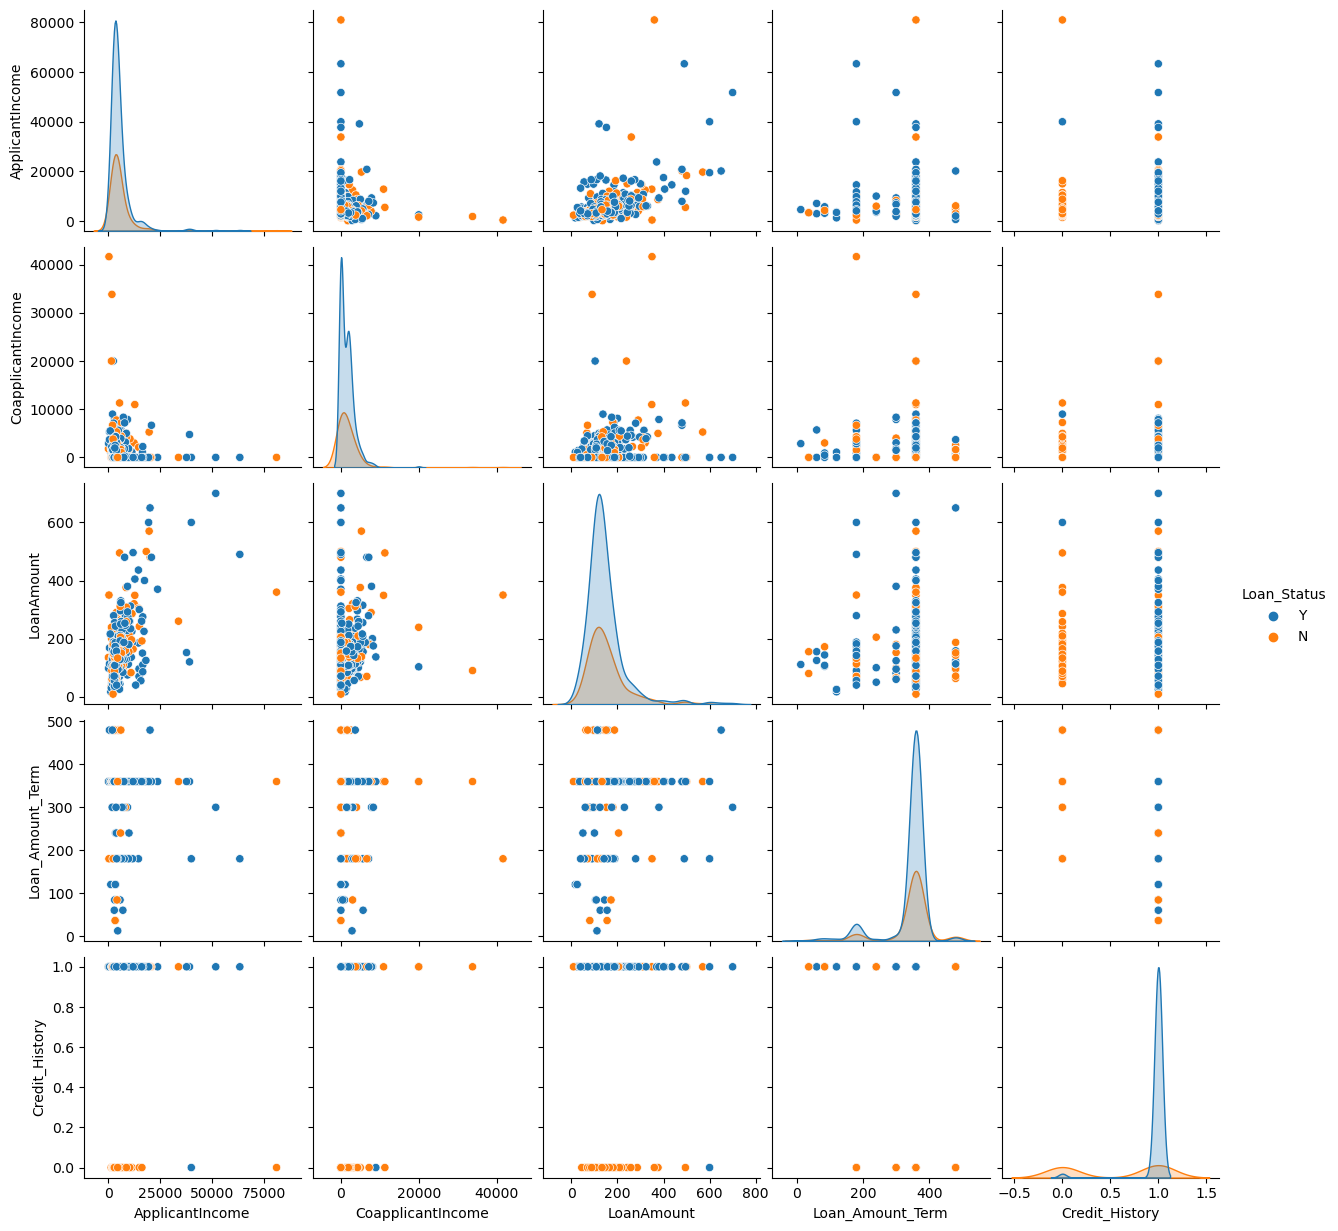

In [11]:
# some data visualization
sns.pairplot(data=df,hue='Loan_Status')

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

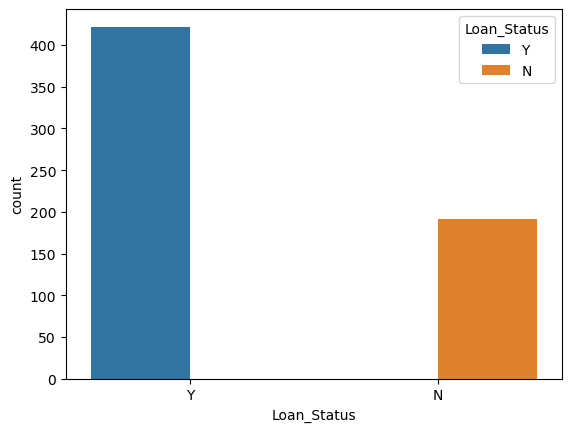

In [12]:
sns.countplot(data=df,x='Loan_Status',hue='Loan_Status')

In [13]:
# correlation in the dataset

df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


<AxesSubplot:>

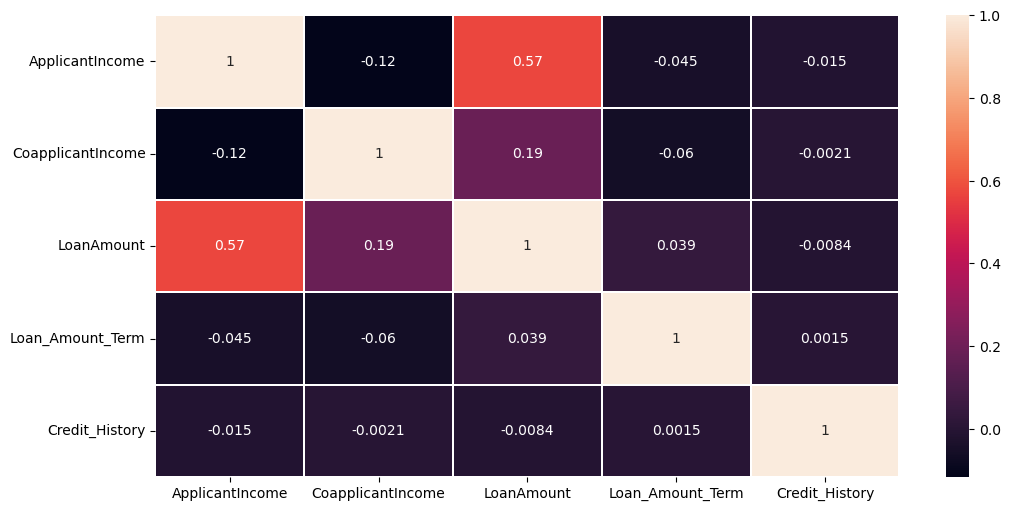

In [31]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True,linecolor='white',linewidths=0.2)

<AxesSubplot:xlabel='Gender', ylabel='count'>

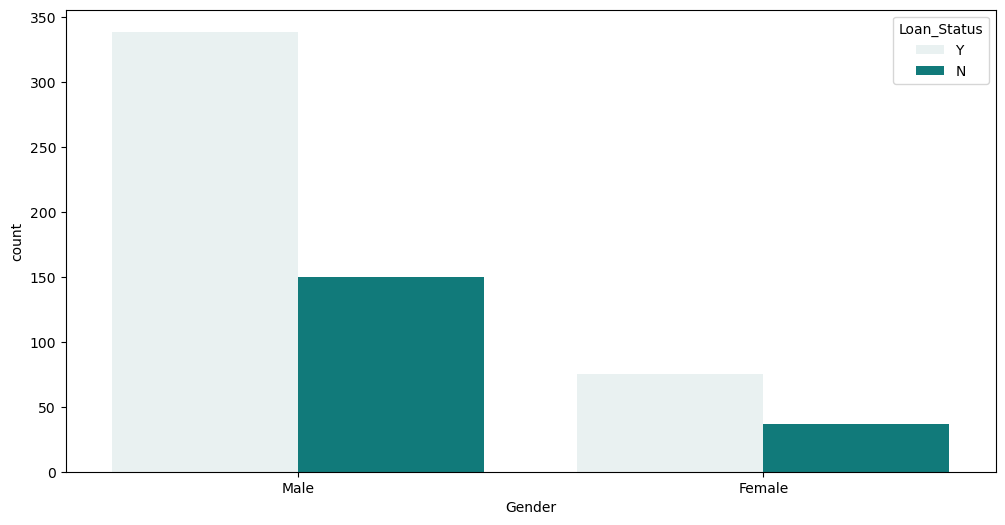

In [44]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Gender' , hue = 'Loan_Status' , data = df , dodge = True , color = 'darkcyan')

<AxesSubplot:xlabel='Married', ylabel='count'>

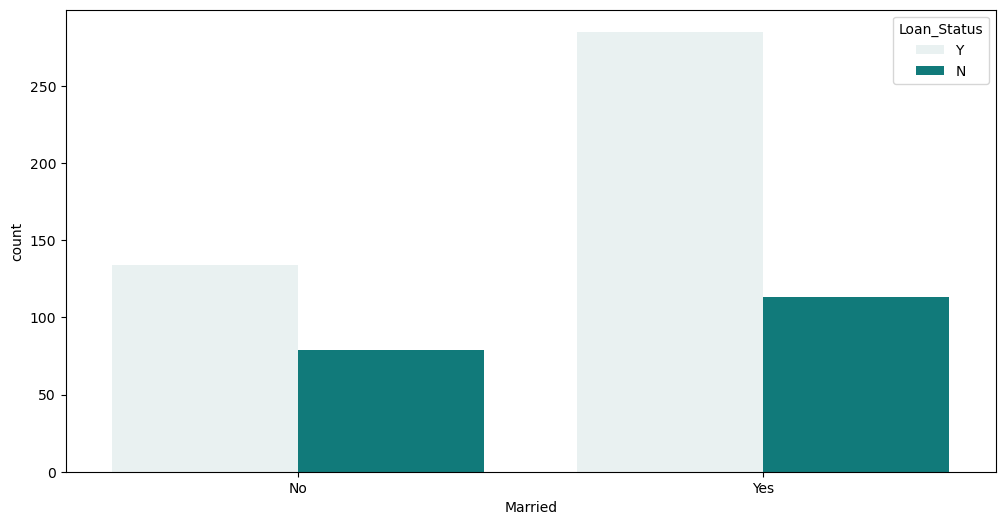

In [45]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Married' , hue = 'Loan_Status' , data = df , dodge = True , color = 'darkcyan')

In [ ]:
finding features which are of integer datatype

# Data Preprocessing

In [47]:
int_type = [feature for feature in df.columns if df[feature].dtypes !='O']
print(int_type)
print("Number of columns with integer data type in adf is :" , len(int_type))

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
Number of columns with integer data type in adf is : 5


In [48]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [49]:
for col in df:
    percentage = np.round((df[col].isnull().sum()/614)*100,2)
    print(col,':' , percentage,'%')

Loan_ID : 0.0 %
Gender : 2.12 %
Married : 0.49 %
Dependents : 2.44 %
Education : 0.0 %
Self_Employed : 5.21 %
ApplicantIncome : 0.0 %
CoapplicantIncome : 0.0 %
LoanAmount : 3.58 %
Loan_Amount_Term : 2.28 %
Credit_History : 8.14 %
Property_Area : 0.0 %
Loan_Status : 0.0 %


In [50]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [51]:
df['Gender'] = df['Gender'].fillna('Male')

In [52]:
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

# Married

In [53]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [54]:
df['Married'] = df['Married'].fillna('Yes')

In [55]:
df['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [ ]:
**Dependent**

In [56]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [57]:
df.Dependents = df['Dependents'].fillna('O')

In [58]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
O      15
Name: Dependents, dtype: int64

In [ ]:
**Self_Employed**

In [59]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [60]:
df.Self_Employed = df['Self_Employed'].fillna('No')